In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models  import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

In [7]:
df = pd.read_csv('spam.csv',encoding='"ISO-8859-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
target_map = {'ham' : 0, 'spam' : 1}
df['target'] = df['v1'].map(target_map)
df.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:>

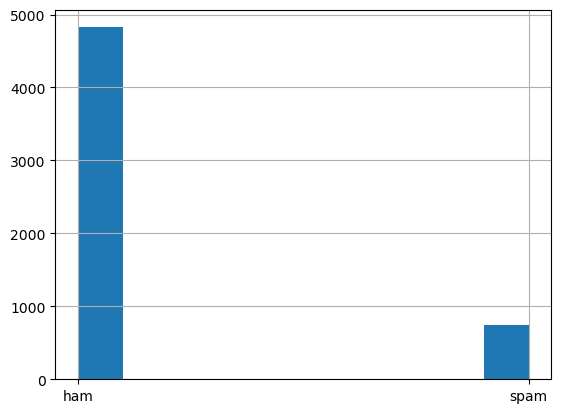

In [8]:
df['v1'].hist()

In [9]:
df_train,df_test = train_test_split(df,random_state=2000)

In [11]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['v2'])
X_test  = vectorizer.transform(df_test['v2'])
y_train = df_train['target']
y_test  = df_test['target']

# input dimension
D = X_train.shape[1]

In [12]:
X_train = X_train.toarray()
X_test  = X_test.toarray()
# input dimension
D

2000

In [13]:
i = Input(shape=(D,))
x = Dense(1)(i)
model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    # sigmoid is applied otherwise the model has to apply sigmoid explicitely
    loss = BinaryCrossentropy(from_logits=True), 
    optimizer = Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [15]:
r = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=40,
    batch_size=128
)

Epoch 1/40
33/33 [==============================] - 3s 43ms/step - loss: 0.5438 - accuracy: 0.8662 - val_loss: 0.4131 - val_accuracy: 0.8650
Epoch 2/40
33/33 [==============================] - 0s 12ms/step - loss: 0.3488 - accuracy: 0.8684 - val_loss: 0.2942 - val_accuracy: 0.8744
Epoch 3/40
33/33 [==============================] - 0s 12ms/step - loss: 0.2616 - accuracy: 0.8887 - val_loss: 0.2328 - val_accuracy: 0.9060
Epoch 4/40
33/33 [==============================] - 0s 12ms/step - loss: 0.2113 - accuracy: 0.9141 - val_loss: 0.1942 - val_accuracy: 0.9253
Epoch 5/40
33/33 [==============================] - 0s 12ms/step - loss: 0.1773 - accuracy: 0.9316 - val_loss: 0.1668 - val_accuracy: 0.9375
Epoch 6/40
33/33 [==============================] - 0s 14ms/step - loss: 0.1527 - accuracy: 0.9442 - val_loss: 0.1467 - val_accuracy: 0.9519
Epoch 7/40
33/33 [==============================] - 0s 13ms/step - loss: 0.1340 - accuracy: 0.9529 - val_loss: 0.1314 - val_accuracy: 0.9576
Epoch 8/40
33

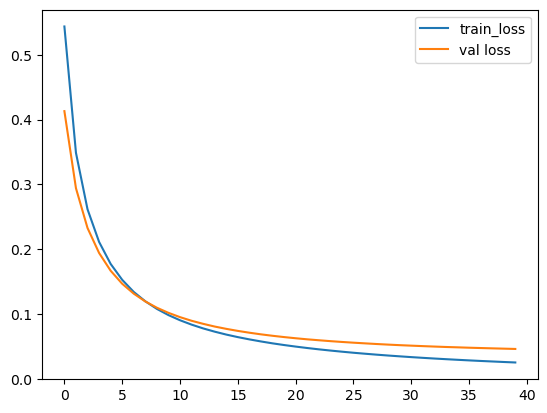

In [16]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()

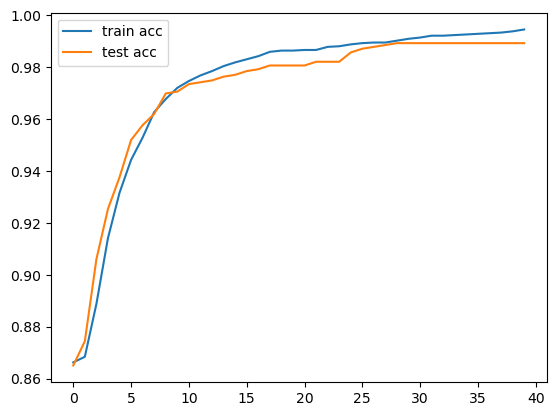

In [17]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='test acc')
plt.legend()

In [18]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test  = ((model.predict(X_test) > 0)* 1.0).flatten()

44/44 [==============================] - 0s 6ms/step


In [19]:
cm = confusion_matrix(y_train,P_train)
cm

array([[3618,    2],
       [  12,  547]], dtype=int64)

In [21]:
def plot_cm(cm):
    classes = ['negative','positive']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    ax = sns.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

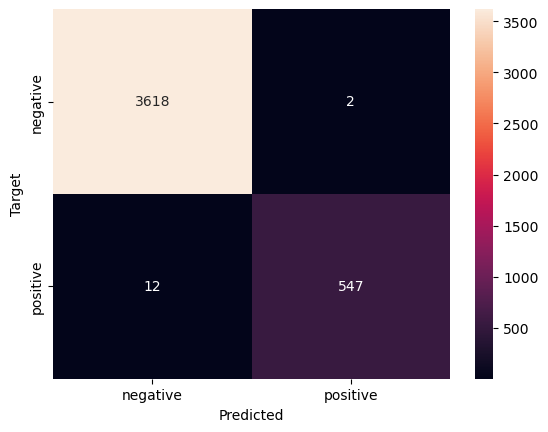

In [22]:
plot_cm(cm)

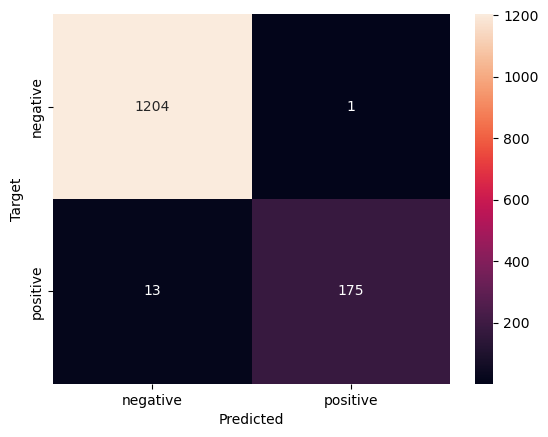

In [23]:
cm_test = confusion_matrix(y_test,P_test)
plot_cm(cm_test)

In [24]:
Pr_train = model.predict(X_train)
Pr_test  = model.predict(X_test)
print('Train AUC ', roc_auc_score(y_train,Pr_train))
print('Test AUC ', roc_auc_score(y_test,Pr_test))

44/44 [==============================] - 0s 5ms/step
Train AUC  0.9998566896292709
Test AUC  0.9922221241281892


In [25]:
print('Train F1 ', f1_score(y_train,P_train))
print('Test F1 ', f1_score(y_test,P_test))

Train F1  0.9873646209386282
Test F1  0.9615384615384616


In [26]:
model.layers

In [27]:
model.layers[1].get_weights()

[array([[ 2.508626 ],
        [ 2.2349565],
        [ 1.8532847],
        ...,
        [-2.0120769],
        [-1.3277705],
        [-1.8589553]], dtype=float32),
 array([-2.145203], dtype=float32)]

In [28]:
w = model.layers[1].get_weights()[0]
word_index_map = vectorizer.vocabulary_
word_index_map

{'but': 313,
 'there': 1704,
 'is': 897,
 'only': 1242,
 'exe': 616,
 'file': 654,
 'which': 1910,
 'can': 336,
 'run': 1445,
 'that': 1694,
 'after': 128,
 'say': 1461,
 'fri': 697,
 'leh': 984,
 'he': 794,
 'said': 1450,
 'cant': 340,
 'make': 1061,
 'wait': 1861,
 'lor': 1032,
 'what': 1903,
 'your': 1988,
 'account': 114,
 'number': 1215,
 'ok': 1231,
 'orange': 1251,
 'customer': 450,
 'you': 1987,
 'may': 1085,
 'now': 1211,
 'claim': 379,
 'free': 691,
 'camera': 334,
 'phone': 1290,
 'upgrade': 1823,
 'for': 682,
 'loyalty': 1046,
 'call': 323,
 'on': 1236,
 'offer': 1225,
 'ends': 579,
 'july': 930,
 'apply': 182,
 'opt': 1248,
 'out': 1261,
 'available': 217,
 'told': 1749,
 'her': 804,
 'had': 771,
 'appt': 185,
 'next': 1190,
 'week': 1890,
 'she': 1512,
 'thinks': 1712,
 'gonna': 746,
 'die': 500,
 'its': 904,
 'just': 932,
 'check': 366,
 'nothing': 1209,
 'to': 1743,
 'be': 241,
 'worried': 1948,
 'about': 107,
 'didn': 498,
 'listen': 1008,
 'it': 902,
 'does': 520,
 's

In [29]:
threshold = 2
print('Most positive words')
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index,0]
    if weight > threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples,key=lambda x : -x[1])
for i in range(10):
    word,weight = word_weight_tuples[i]
    print(word,weight)

Most positive words
txt 4.8439016
text 4.4486427
uk 4.4207077
150p 4.159003
50 4.101857
stop 4.0455065
mobile 3.961155
service 3.936558
co 3.9345207
www 3.9000185


In [30]:
threshold = 2
print('Most Negative words')
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index,0]
    if weight < -threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples,key=lambda x : x[1])
for i in range(10):
    word,weight = word_weight_tuples[i]
    print(word,weight)

Most Negative words
gt -2.9872978
mail -2.969464
later -2.9571636
lt -2.907168
me -2.875951
once -2.8725688
fullonsms -2.857363
yup -2.846938
thats -2.8325732
ok -2.8159516
